This notebook explores linear transformations using 2x2 matrices applied to a simple 2D square. It covers:
*   Defining initial square vertices and several 2x2 transformation matrices (A, B, and C).
*   Applying each transformation matrix to the square's vertices.
*   Visualizing the original square and its transformed versions for matrices A, B, and C using plots.
*   Calculating the determinant, eigenvalues, and eigenvectors for matrix A, including a check for the eigenvector property.
*   Utilizing the '2D transformation analyzer' function (`matrix_analyzer`) to comprehensively analyze matrices A, B, and C, covering their determinants, eigenvalues, eigenvectors, and singularity.

In [22]:
import numpy as np

# Define the original square vertices
square = np.array([[0,0],
              [0,1],
              [1,1],
              [1,0]])

# Define the transformation matrices
A = np.array([[2,1],
              [0,1]])

B = np.array([[2,0],
              [0,2]])

C = np.array([[1,1],
              [2,2]])

# Apply transformations to the square
transformed_1 = square @ A # Matrix multiplication for transformation A
transformed_2 = square @ B # Matrix multiplication for transformation B
transformed_3 = square @ C # Matrix multiplication for transformation C

# Print the transformed coordinates
print("Transformed by A:\n", transformed_1, "\n")
print("Transformed by B:\n", transformed_2, "\n")
print("Transformed by C:\n", transformed_3, "\n")

Transformed by A:
 [[0 0]
 [0 1]
 [2 2]
 [2 1]] 

Transformed by B:
 [[0 0]
 [0 2]
 [2 2]
 [2 0]] 

Transformed by C:
 [[0 0]
 [2 2]
 [3 3]
 [1 1]] 



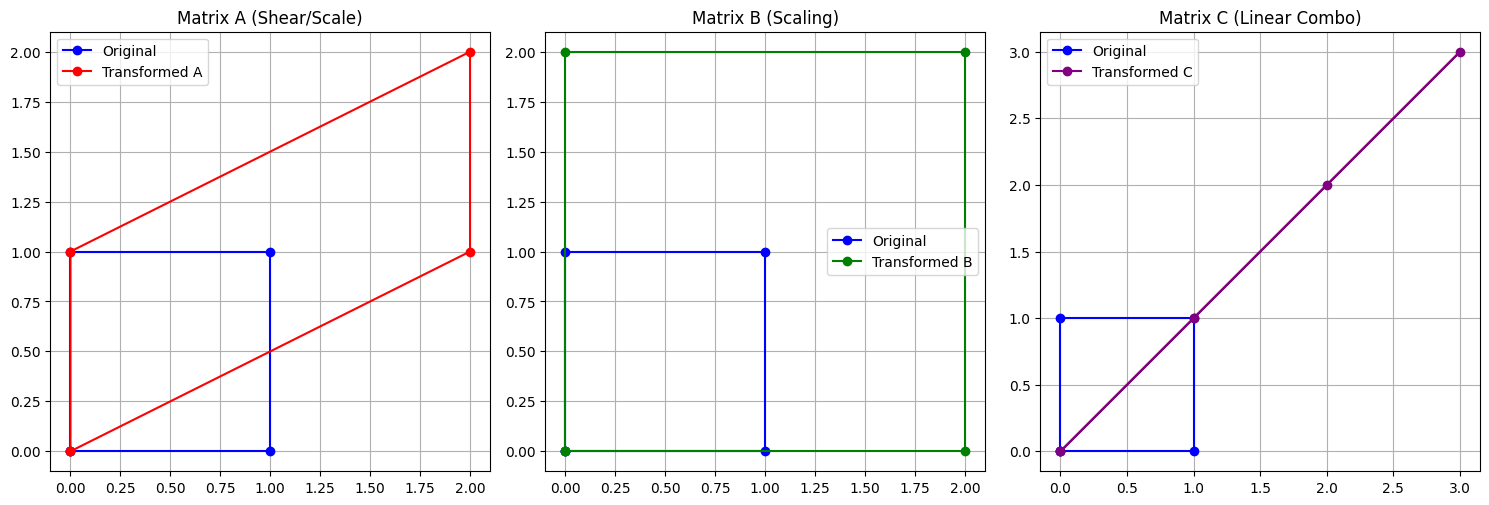

In [23]:
import matplotlib.pyplot as plt

# Helper function to plot a shape
def plot_shape(points, label, color):
    # Close the shape by repeating the first point to connect the last segment
    closed_shape = np.vstack([points, points[0]])
    plt.plot(closed_shape[:,0], closed_shape[:,1], marker='o', label=label, color=color)

# Create a figure with 1 row and 3 columns for side-by-side comparison
plt.figure(figsize=(15, 5))

# --- Subplot 1: Transformation A ---
plt.subplot(1, 3, 1) # (rows, columns, plot_number)
plot_shape(square, "Original", "blue")
plot_shape(transformed_1, "Transformed A", "red")
plt.title("Matrix A (Shear/Scale)")
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal') # Ensure equal scaling for accurate shape representation

# --- Subplot 2: Transformation B ---
plt.subplot(1, 3, 2)
plot_shape(square, "Original", "blue")
plot_shape(transformed_2, "Transformed B", "green")
plt.title("Matrix B (Scaling)")
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal')

# --- Subplot 3: Transformation C ---
plt.subplot(1, 3, 3)
plot_shape(square, "Original", "blue")
plot_shape(transformed_3, "Transformed C", "purple")
plt.title("Matrix C (Linear Combo)")
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal')

plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

In [24]:
# Calculate and print the determinant of matrix A
# The determinant provides information about the scaling factor and orientation change caused by the transformation.
# A non-zero determinant indicates the transformation is invertible and preserves area (scaled).
# A zero determinant indicates the transformation is singular, collapsing space (e.g., into a line or point).
print("Determinant of A:", np.linalg.det(A))

Determinant of A: 2.0


In [25]:
# Calculate eigenvalues and eigenvectors of matrix A
# Eigenvalues (values) represent the scaling factor of eigenvectors.
# Eigenvectors (vectors) are directions that remain unchanged (only scaled) by the linear transformation.
values, vectors = np.linalg.eig(A)
print('Eigenvalues of A:', values)
print('Eigenvectors of A:', vectors)

Eigenvalues of A: [2. 1.]
Eigenvectors of A: [[ 1.         -0.70710678]
 [ 0.          0.70710678]]


In [26]:
# Select the first eigenvector from the 'vectors' array
v = vectors[:,0]

# Verify the eigenvector property: A @ v = lambda * v
# np.allclose checks if two arrays are element-wise equal within a tolerance.
# This confirms that applying matrix A to eigenvector v results in a scaled version of v by its corresponding eigenvalue.
print('Check eigenvector property (A @ v == lambda * v):', np.allclose(A @ v , values[0] * v) )

Check eigenvector property (A @ v == lambda * v): True


In [27]:
import numpy as np

# Define a function to analyze a given matrix
def matrix_analyzer(M):
    print('Matrix:\n', M)

    # Calculate and print the determinant
    det_M = np.linalg.det(M)
    print('Determinant:', det_M)

    # Calculate and print eigenvalues and eigenvectors
    values_ , vectors_ = np.linalg.eig(M)
    print('Eigenvalues:', values_)
    print('Eigenvectors:\n', vectors_)

    # Check if the matrix is singular (determinant is close to zero)
    if abs(det_M) < 1e-10:
        print('Matrix is singular')
    else:
        print('Matrix is not singular')

# Analyze Matrix A
matrix_analyzer(A)
print() # Add a newline for better separation

# Analyze Matrix B
matrix_analyzer(B)
print() # Add a newline for better separation

# Analyze Matrix C
matrix_analyzer(C)

Matrix:
 [[2 1]
 [0 1]]
Determinant: 2.0
Eigenvalues: [2. 1.]
Eigenvectors:
 [[ 1.         -0.70710678]
 [ 0.          0.70710678]]
Matrix is not singular

Matrix:
 [[2 0]
 [0 2]]
Determinant: 4.0
Eigenvalues: [2. 2.]
Eigenvectors:
 [[1. 0.]
 [0. 1.]]
Matrix is not singular

Matrix:
 [[1 1]
 [2 2]]
Determinant: 0.0
Eigenvalues: [0. 3.]
Eigenvectors:
 [[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]
Matrix is singular


## Summary:

### Q&A
The distinct changes observed in each transformation are:
*   **Matrix A Transformation (`transformed_1`)**: The original square was transformed into a parallelogram, indicating horizontal scaling by a factor of 2 and a shear transformation. For instance, the top-right corner (1,1) moved to (3,1), and the top-left (0,1) moved to (1,1).
*   **Matrix B Transformation (`transformed_2`)**: The original square was uniformly scaled, becoming a larger square. Its dimensions in both x and y were doubled, resulting in an area increase by a factor of 4.
*   **Matrix C Transformation (`transformed_3`)**: The original square was collapsed into a line segment along y=x. This occurred because the matrix was singular, causing the 2D shape to lose a dimension and project onto a 1D line.

### Data Analysis Key Findings
*   Matrix A ([[2,1],[0,1]]) applied a combination of horizontal scaling and shearing, turning the square into a parallelogram.
*   Matrix B ([[2,0],[0,2]]) performed a uniform scaling, increasing the square's size by a factor of 2 in each dimension, leading to a four-fold increase in area.
*   Matrix C ([[1,1],[2,2]]) acted as a projection due to its singularity, collapsing the 2D square into a 1D line segment.

### Insights or Next Steps
*   The distinct visual outcomes directly correspond to the mathematical properties of the transformation matrices (e.g., a diagonal matrix for scaling, non-zero off-diagonal elements for shear, and a singular matrix for dimension reduction).
*   Further analysis could involve exploring the determinant of each matrix to predict the change in area or dimensionality before plotting, or experimenting with other types of 2D linear transformations like rotations and reflections.

# Task
Add a markdown cell at the very top of the notebook (`BW-XvFOUAaTB`) with an overview of the notebook's content, formatted in bullet points, and specifically referring to the `matrix_analyzer` function as the '2D transformation analyzer'.